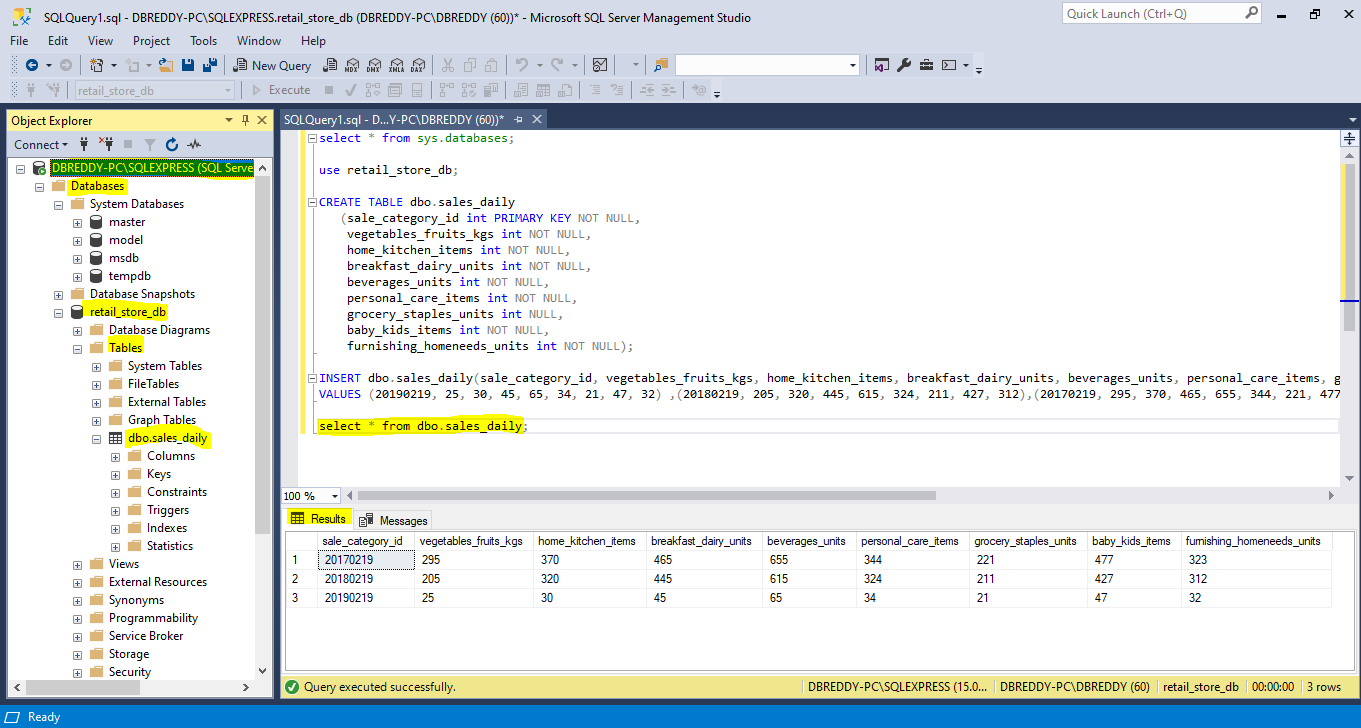

In [30]:
from IPython.display import Image
Image(filename = "sqlserver_db_table.png",width=1200,height=1200)

In [1]:
import  pyodbc

In [3]:
print(dir(pyodbc))

['BINARY', 'Binary', 'BinaryNull', 'Connection', 'Cursor', 'DATETIME', 'DataError', 'DatabaseError', 'Date', 'DateFromTicks', 'Error', 'IntegrityError', 'InterfaceError', 'InternalError', 'NUMBER', 'NotSupportedError', 'OperationalError', 'ProgrammingError', 'ROWID', 'Row', 'SQLWCHAR_SIZE', 'SQL_ACCESSIBLE_PROCEDURES', 'SQL_ACCESSIBLE_TABLES', 'SQL_ACCESS_MODE', 'SQL_ACTIVE_ENVIRONMENTS', 'SQL_AGGREGATE_FUNCTIONS', 'SQL_ALTER_DOMAIN', 'SQL_ALTER_TABLE', 'SQL_ASYNC_MODE', 'SQL_ATTR_ACCESS_MODE', 'SQL_ATTR_ANSI_APP', 'SQL_ATTR_AUTOCOMMIT', 'SQL_ATTR_CURRENT_CATALOG', 'SQL_ATTR_LOGIN_TIMEOUT', 'SQL_ATTR_ODBC_CURSORS', 'SQL_ATTR_QUIET_MODE', 'SQL_ATTR_TRACE', 'SQL_ATTR_TRACEFILE', 'SQL_ATTR_TRANSLATE_LIB', 'SQL_ATTR_TRANSLATE_OPTION', 'SQL_ATTR_TXN_ISOLATION', 'SQL_AUTOCOMMIT', 'SQL_BATCH_ROW_COUNT', 'SQL_BATCH_SUPPORT', 'SQL_BIGINT', 'SQL_BINARY', 'SQL_BIT', 'SQL_BOOKMARK_PERSISTENCE', 'SQL_CATALOG_LOCATION', 'SQL_CATALOG_NAME', 'SQL_CATALOG_NAME_SEPARATOR', 'SQL_CATALOG_TERM', 'SQL_CATAL

In [6]:
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client 11.0', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [12]:
conn = pyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                      "Server=DBREDDY-PC\SQLEXPRESS;"  # localhost windows authentication
                      "Database=retail_store_db;"
                      "Trusted_Connection=yes;")
print(dir(conn))
cursor = conn.cursor()
print("------------------------------------")
print(dir(cursor))

['__class__', '__delattr__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'add_output_converter', 'autocommit', 'clear_output_converters', 'close', 'commit', 'cursor', 'execute', 'get_output_converter', 'getinfo', 'maxwrite', 'remove_output_converter', 'rollback', 'searchescape', 'set_attr', 'setdecoding', 'setencoding', 'timeout']
------------------------------------
['__class__', '__delattr__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'arraysize', 'cancel'

In [15]:
cursor.tables()
table_names = cursor.fetchall()
print(type(table_names))
print(table_names)


<class 'list'>
[('retail_store_db', 'dbo', 'sales_daily', 'TABLE', None), ('retail_store_db', 'sys', 'trace_xe_action_map', 'TABLE', None), ('retail_store_db', 'sys', 'trace_xe_event_map', 'TABLE', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'CHECK_CONSTRAINTS', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'COLUMN_DOMAIN_USAGE', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'COLUMN_PRIVILEGES', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'COLUMNS', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'CONSTRAINT_COLUMN_USAGE', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'CONSTRAINT_TABLE_USAGE', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'DOMAIN_CONSTRAINTS', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'DOMAINS', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'KEY_COLUMN_USAGE', 'VIEW', None), ('retail_store_db', 'INFORMATION_SCHEMA', 'PARAMETERS', 'VIEW', None), ('retail_store_db', 'INFORMAT

In [20]:
final_table_list = []
for i in table_names:
    # print(i)
    # print(type(i))
    if i[1] == 'dbo':  # dbo means database owner
        req_table = i[2]
        final_table_list.append(req_table)
print(final_table_list)

['sales_daily']


In [24]:
import  csv
print(dir(csv))
for k in final_table_list:
    print(k)
    query = "select * from" + ' ' + k
    print(query)
    cursor.execute(query)
    data_rows = cursor.fetchall()
    print(data_rows)
    with open(k + '.csv', 'w', newline='') as f:
        a = csv.writer(f, delimiter=',')
        a.writerow(["sale_category_id", "vegetables_fruits_kgs", "home_kitchen_items", "breakfast_dairy_units", "beverages_units", "personal_care_items", "grocery_staples_units", "baby_kids_items", "furnishing_homeneeds_units"])
        a.writerows(data_rows)

['Dialect', 'DictReader', 'DictWriter', 'Error', 'QUOTE_ALL', 'QUOTE_MINIMAL', 'QUOTE_NONE', 'QUOTE_NONNUMERIC', 'Sniffer', 'StringIO', '_Dialect', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', 'excel', 'excel_tab', 'field_size_limit', 'get_dialect', 'list_dialects', 're', 'reader', 'register_dialect', 'unix_dialect', 'unregister_dialect', 'writer']
sales_daily
select * from sales_daily
[(20170219, 295, 370, 465, 655, 344, 221, 477, 323), (20180219, 205, 320, 445, 615, 324, 211, 427, 312), (20190219, 25, 30, 45, 65, 34, 21, 47, 32)]


In [31]:
# sales_daily.csv is created in your directory